# PERCEPTRON TRICK

In [150]:
def perceptron_trick(x_train , y_train):
  ones = np.ones((x_train.shape[0] , 1))
  x_train = np.hstack((x_train  ,  ones))
  epochs  = 10000
  weights = np.ones(x_train.shape[1])
  learning_rate = 0.01
  for i  in range(epochs):
    # pick random index
      random_index = np.random.randint(0 , x_train.shape[0])
      point_x = x_train[random_index]
      y = y_train[random_index]
      y_hat =  np.dot(point_x  , weights)
      pred = 0
      if y_hat>=0:
        pred = 1

    # belongs to neg region but in pos
      weights  = weights + learning_rate*(y-pred)*point_x
  return weights



In [153]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples per class
n_samples = 100

# Class 0 (label 0)
x0 = np.random.randn(n_samples, 2) + np.array([0, 0])
y0 = np.zeros(n_samples)

# Class 1 (label 1)
x1 = np.random.randn(n_samples, 2) + np.array([3, 3])
y1 = np.ones(n_samples)

# Combine the data
x_train = np.vstack((x0, x1))
y_train = np.hstack((y0, y1))

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (200, 2)
y_train shape: (200,)


In [141]:
import seaborn as sns

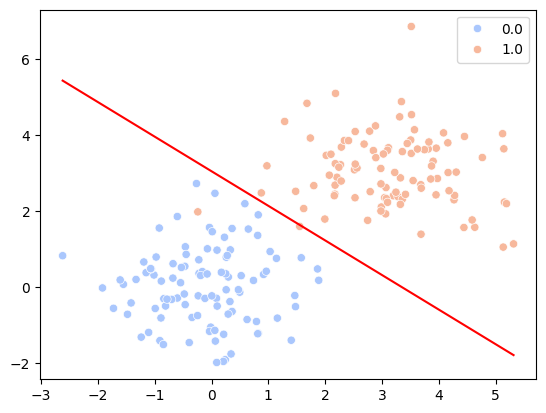

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# Train perceptron
weights = perceptron_trick(x_train, y_train)

# Scatter plot
sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=y_train, palette="coolwarm")

# Plot decision boundary
x_vals = np.linspace(x_train[:,0].min(), x_train[:,0].max(), 100)
y_vals = -(weights[0]/weights[1])*x_vals - (weights[2]/weights[1])  # weights[2] is bias
plt.plot(x_vals, y_vals, color='red')

plt.show()


# LOSS FUNC USING IS PERCEPTRON LOSS FUNC

 - LOSS= SUM

In [ ]:
# LOADING LIB`
import numpy as np
import pandas as pd

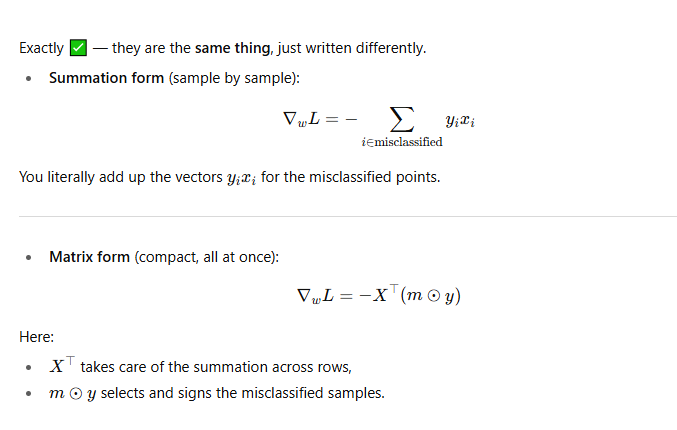

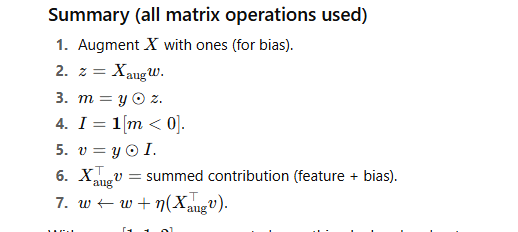

In [ ]:
import numpy as np

# ----------------------
# Data and initial setup
# ----------------------
x = np.array([[1, 2, 1],    # 3 samples, 3 features (last column = bias input)
              [2, -1, 1],
              [-1, -2, 1]])
w = np.array([1, 1])        # initial weights for first 2 features
bias = 2
y = np.array([1, -1, 1])    # true labels for the samples

# Add bias to the weight vector
w = np.append(w, bias)      # w = [w1, w2, bias]

# ----------------------
# Compute per-sample margin
# ----------------------
# z = y * (x . w)
# if z < 0, the point is misclassified
z = y * np.dot(x, w.T)

# ----------------------
# Misclassification indicator
# ----------------------
# Only misclassified points (z <= 0) will contribute to the gradient
# indicator = 1 for misclassified points, 0 otherwise
indicator = np.where(z <= 0, 1, 0)

# ----------------------
# Masked label vector
# ----------------------
# del_l = y * indicator
# Keeps label for misclassified points, zeros out correctly classified points
del_l = y * indicator

# ----------------------
# Compute gradient
# ----------------------
# Gradient is sum over misclassified samples: X^T * del_l
L = np.dot(x.T, del_l)

# ----------------------
# Update weights with learning rate
# ----------------------
lr = 0.01
w = w - lr * L

# ----------------------
# Updated weights
# ----------------------
print(w)


[1.03 1.01 2.  ]


In [110]:
import numpy as np

def gradient_descent_custom_loss(X, y, weights=None, learning_rate=0.01, epochs=1000):
    n_samples, n_features = X.shape
    if weights is None:
        weights = np.ones(n_features)

    for epoch in range(epochs):
        # Compute predictions
        z = np.dot(X, weights)

        # Mask for misclassified points (0 for correct, 1 for misclassified)
        mask = (y * z <= 0).astype(float)  # shape (n_samples,)

        # Compute gradient using dot product
        # Multiply each row of X by mask*y and sum via dot
        grad = -np.dot(mask * y, X)

        # Gradient descent update
        weights = (weights - learning_rate * grad)/X.shape[0]

    return weights

# Example usage
X = np.array([[1, 2, 1],
              [2, -1, 1],
              [-1, -2, 1]])
y = np.array([1, -1, 1])

final_weights = gradient_descent_custom_loss(X, y, learning_rate=0.01, epochs=1000)
print(final_weights)


[0.00173077 0.00538462 0.00461538]
